<a href="https://colab.research.google.com/github/Kotzly/DS4H_Course/blob/dev_e2/notebooks/DS4H_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Entrega 2**#

## **Alunos**

**Silvia Arantes Pereira Olivio, RA: 224932**<p>
**Paulo Augusto Alves Luz Viana, RA: 263889**<p>
**Débora Rocha Helfstein, RA: 234934**<p>
**Charles M'poca Charles, RA: 163383** 

# Configuração do ambiente

 - Instalação do pacote `ds4h`, que contém as dependências e funções do projeto

In [1]:
!git clone https://github.com/Kotzly/DS4H_Course.git
!pip install -e ./DS4H_Course
%cd ./DS4H_Course/

Cloning into 'DS4H_Course'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (436/436), done.
remote: Compressing objects: 100% (309/309), done.
remote: Total 436 (delta 271), reused 233 (delta 114), pack-reused 0
Receiving objects: 100% (436/436), 2.15 MiB | 8.36 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Obtaining file:///content/DS4H_Course
     |████████████████████████████████| 9.5MB 11.5MB/s 
  Created wheel for zipfile38: filename=zipfile38-0.0.3-cp37-none-any.whl size=22765 sha256=6de6f0abc869413c4981fdc2f0c6a2d156c53de66b1300f5e5cb547bf6cab45f
  Stored in directory: /root/.cache/pip/wheels/15/7a/ec/508d28bf3894e050aef4d0205cdf27a346e6e0891e979345d4
  Created wheel for simpledbf: filename=simpledbf-0.2.6-cp37-none-any.whl size=13793 sha256=0d36a00952a11228186a7674ec295c2ddd4a96b5d5c88de488ae51db984d896b
  Stored in directory: /root/.cache/pip/wheels/72/dd/df/cdfb970a508ef9750ebb4b6e035a3410c3d62b5a6a91d2aafc
Successfully built zipfile38 simpled

/content/DS4H_Course


In [2]:
!git pull

Already up to date.


In [3]:
import ds4h
from ds4h.data.download_sinasc import download_dbc, download_dbf_2020
from ds4h.processing.dbc import dbc_to_csv, dbf_to_csv
from ds4h.processing.csv import join_sinasc_files
from ds4h.processing.sinasc import process_sinasc

from pathlib import Path
from ds4h.data.city_ranking import get_ranking_dataframe, get_top_cities_from_df
from ds4h.processing.sinasc import code_to_str

import seaborn as sns
import matplotlib.pyplot as plt
from ds4h.processing.sinasc import SINASC_TRANSLATE_DICT


Criação dos diretórios onde serão salvos os arquivos baixados e processados.

In [4]:
dataset_root = Path("/datasets/sinasc")
dbc_path = dataset_root / "dbc"
csv_path = dataset_root / "csv"
dbf_folder = dataset_root / "dbf"

dbf_folder.mkdir(exist_ok=True, parents=True)
csv_path.mkdir(exist_ok=True, parents=True)
dbc_path.mkdir(exist_ok=True, parents=True)

Download dos arquivos DBC, oriundos do DATASUS, dos anos de 2010 até 2019.

In [6]:
download_dbc(dbc_path, n_jobs=11)

Utilização do script `dbc_to_csv.r` para transformação dos arquivos DBC para CSV. O script utiliza a função `read.dbc` para isso, disponível no CRAN.

In [7]:
dbc_to_csv(dbc_path, csv_path);

gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-wP4Uzq/r-base-4.0.5=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c blast.c -o blast.o
gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-wP4Uzq/r-base-4.0.5=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c dbc2dbf.c -o dbc2dbf.o
gcc -std=gnu99 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o read.dbc.so blast.o dbc2dbf.o -L/usr/lib/R/lib -lR
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2010.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2011.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2012.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2013.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2014.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2015.dbc"
[1] "/home/pau

Aqui o dataset com os dados de 2020 é baixado. Ele é baixado separadamente pois não está no mesmo repositório que os outros anos. Adicionalmente, o arquivo está no formato DBF, que pode ser transformado para a extensão CSV utilizando a biblioteca `simpledbf`.

In [8]:
download_dbf_2020(dbf_folder)

dbf_filepath = list(dbf_folder.glob("*.DBF"))[0]
dbf_to_csv(dbf_filepath, csv_path)

Aquios arquivos CSV são unidos em um único Dataframe.

In [9]:
union_df = join_sinasc_files(csv_path)
union_df

Loading DNSP2017.csv
Loading DNSP2011.csv
Loading DNSP2018.csv
Loading DNSP2015.csv
Loading DNSP2019.csv
Loading DNSP2013.csv
Loading DNSP2010.csv
Loading DNBR20DA.csv
Loading DNSP2012.csv
Loading DNSP2014.csv
Loading DNSP2016.csv


,CODMUNNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,PARTO,DTNASC,RACACOR,IDANOMAL,RACACORMAE
0,150140,18.0,1.0,4.0,NaN,NaN,5.0,2.0,17062017,4.0,2.0,4.0
1,170950,13.0,1.0,3.0,0.0,0.0,4.0,1.0,17012017,4.0,2.0,4.0
2,172100,17.0,5.0,4.0,0.0,0.0,5.0,2.0,6032017,4.0,2.0,4.0
3,210675,19.0,1.0,4.0,1.0,0.0,5.0,2.0,25032017,4.0,2.0,4.0
4,211230,24.0,1.0,4.0,2.0,0.0,5.0,2.0,16022017,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
601432,350320,36.0,NaN,NaN,NaN,NaN,5.0,1.0,26052016,NaN,2.0,NaN
601433,351620,27.0,NaN,NaN,NaN,NaN,4.0,2.0,5022016,NaN,2.0,NaN
601434,351620,27.0,NaN,NaN,NaN,NaN,4.0,2.0,5022016,NaN,2.0,NaN
601435,351620,38.0,NaN,NaN,NaN,NaN,4.0,2.0,5022016,NaN,2.0,NaN


As cidades são selecionadas.

In [10]:
df = get_ranking_dataframe()
cities_dict = get_top_cities_from_df(df)
print(cities_dict)

{354880: 'São Caetano do Sul', 351440: 'Dracena', 352480: 'Jales', 354680: 'Santa Isabel', 350210: 'Andradina', 354980: 'São Josã do Rio Preto', 354850: 'Santos', 350570: 'Barueri', 351740: 'Guaãra', 350280: 'Araãatuba', 355030: 'São Paulo'}


In [11]:
union_df.columns

Index(['CODMUNNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
       'QTDFILMORT', 'GESTACAO', 'PARTO', 'DTNASC', 'RACACOR', 'IDANOMAL',
       'RACACORMAE'],
      dtype='object')

Aqui o Dataframe com todos os dados são processados. O processamento realizado é:
 - A coluna `DTNASC` é processada, pois os dados originais não estão conforme o dicionário de dados fornecido, e a data está no formato de string.
 - A coluna `MUNNAME` é criada, com os nomes das cidades, ao invés do código do munícipio que está originalmente presente.
 - A coluna `AGEGROUP` é criada, e tem os valores:
    - 'A1', se IDADEMAE < 20;
    - 'A2', se 20 <= IDADEMAE < 35;
    - 'A3', se IDADEMAE >= 35.
 - As colunas `YEAR`, `MONTH` e `DAY` são criadas, baseando-se na colunas `DTNASC`.
 - O dicionário de dados prevê a existência de valores que foram ignorados, provavelmente não preenchidos. Estes valores foram substituídos por NULL, bem como certo valores estranhos, como o valor de 99 na colunas `IDADEMAE` (idade da mãe). Para as colunas categóricas, as categorias foram codificadas de 1 até N, sendo N o número de categorias. Desta maneira Valores maiores que N foram transformados em NULL, para que depois pudessem ser descartados durante as análises.
    - `QTDFILVIVO`: valores maiores que 30.
    - `QTDFILMORT`: valores maiores que 30.
    - `IDADEMAE`: valores maiores que 65.
    - `ESTCIVMAE`: valores maiores que 5.
    - `PARTO`: valores maiores que 2.
    - `IDANOMAL`: valores maiores que 2.
    - `GESTACAO`: valores maiores que 6.
    - `RACACOR`: valores maiores que 5.
    - `RACACORMAE`: valores maiores que 5.
    - `ESCMAE`: valores maiores que 5.


In [12]:
df = process_sinasc(union_df, city_code_dict=cities_dict)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # we have an equal len list/ndarray


In [40]:
import numpy as np
def null_proportion(df):
  def null_prop(x):
    return "{:.2f}%".format(x * 100)
  return df.isna().mean(axis=0).apply(null_prop)

In [41]:
null_proportion(union_df)

CODMUNNASC     0.00%
IDADEMAE       0.00%
ESTCIVMAE      0.40%
ESCMAE         0.46%
QTDFILVIVO     1.87%
QTDFILMORT     3.02%
GESTACAO       0.75%
PARTO          0.07%
DTNASC         0.00%
RACACOR        1.49%
IDANOMAL       0.49%
RACACORMAE    14.92%
dtype: object

In [42]:
null_proportion(df)

CODMUNNASC     0.00%
IDADEMAE       0.00%
ESTCIVMAE      0.19%
ESCMAE         0.11%
QTDFILVIVO     0.23%
QTDFILMORT     0.31%
GESTACAO       0.19%
PARTO          0.01%
DTNASC         0.00%
RACACOR        0.13%
IDANOMAL       0.55%
RACACORMAE    17.26%
MUNNAME        0.00%
AGEGROUP       0.00%
YEAR           0.00%
MONTH          0.00%
DAY            0.00%
dtype: object

In [43]:
union_df.describe()
print(union_df.shape)

(8789019, 12)


In [44]:
df.describe()
print(df.shape)

(2452513, 17)


In [18]:
df = code_to_str(df)

In [48]:
translate_dict = SINASC_TRANSLATE_DICT

def pct_lineplot(df, x_col, group_col, percentage=True, y_logscale=False):
  plt.figure(figsize=(14, 5))
  ax = plt.gca()
  ax.grid()
  order = list(translate_dict[x_col].values()) if x_col in translate_dict else None
  hue_order = list(translate_dict[group_col].values()) if group_col in translate_dict else None
  if percentage:
    pct2 = (100 * df.groupby([x_col, group_col]).size() / df.groupby([x_col]).size()).reset_index().rename({0:'percent'}, axis=1)
    plot = sns.lineplot(x=x_col, hue=group_col, y='percent', data=pct2, ax=ax, hue_order=hue_order)
    ticks = ax.get_yticks()
    ax.set_yticklabels([f"{x}%" for x in ticks])
  else:
    plot = sns.lineplot(data=df, x=x_col, hue=group_col, ax=ax, hue_order=hue_order)

  if y_logscale:
    ax.set_yscale("log")

  ax.set_ylabel("Count" if percentage else "Percentage [%]")
  ax.set_xlabel(x_col)

  ax.set_title(f"Count per {x_col} stratified by {group_col}")
  ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

  plt.show()
  plt.close()

def pct_plot(df, x_col, group_col, percentage=True, y_logscale=False):
  plt.figure(figsize=(14, 5))
  ax = plt.gca()
  ax.grid()
  order = list(translate_dict[x_col].values()) if x_col in translate_dict else None
  hue_order = list(translate_dict[group_col].values()) if group_col in translate_dict else None
  if percentage:
    group_df = (100 * df.groupby([x_col, group_col]).size() / df.groupby([x_col]).size()).reset_index().rename({0:'percent'}, axis=1)
    plot = sns.barplot(data=group_df, x=x_col, hue=group_col, y='percent', ax=ax, order=order, hue_order=hue_order)
    ticks = ax.get_yticks()
    ax.set_yticklabels([f"{x}%" for x in ticks])
  else:
    group_df = df.groupby([x_col, group_col]).count()
    plot = sns.countplot(data=df, x=x_col, hue=group_col, ax=ax, order=order, hue_order=hue_order)

  if y_logscale:
    ax.set_yscale("log")

  ax.set_ylabel("Count" if percentage else "Percentage [%]")
  ax.set_xlabel(x_col)

  ax.set_title(f"Count per {x_col} stratified by {group_col}")
  ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

  plt.show()
  plt.close()

  return group_df

In [49]:
df.columns

Index(['CODMUNNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
       'QTDFILMORT', 'GESTACAO', 'PARTO', 'DTNASC', 'RACACOR', 'IDANOMAL',
       'RACACORMAE', 'MUNNAME', 'AGEGROUP', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')

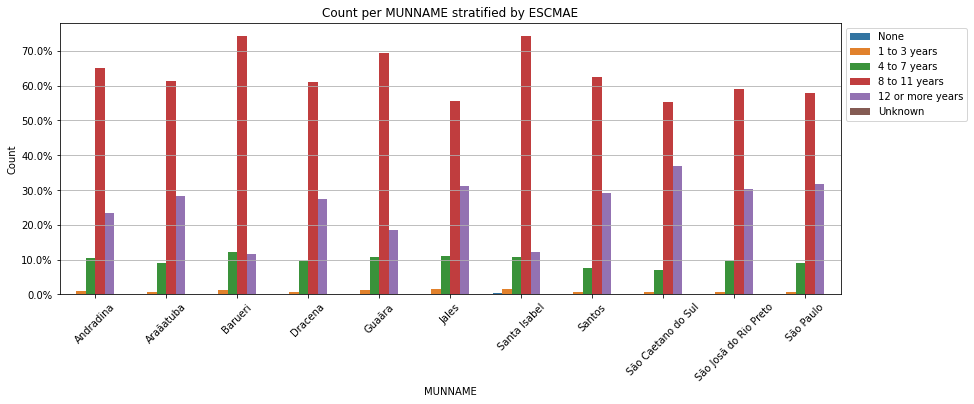

,MUNNAME,ESCMAE,percent
0,Andradina,1 to 3 years,0.913637
1,Andradina,12 or more years,23.312175
2,Andradina,4 to 7 years,10.434699
3,Andradina,8 to 11 years,64.983651
4,Andradina,None,0.057703
5,Araãatuba,1 to 3 years,0.683868
6,Araãatuba,12 or more years,28.425121
7,Araãatuba,4 to 7 years,9.058773
8,Araãatuba,8 to 11 years,61.356503
9,Araãatuba,None,0.085896


In [51]:
pct_plot(df, "MUNNAME", "ESCMAE", percentage=True)

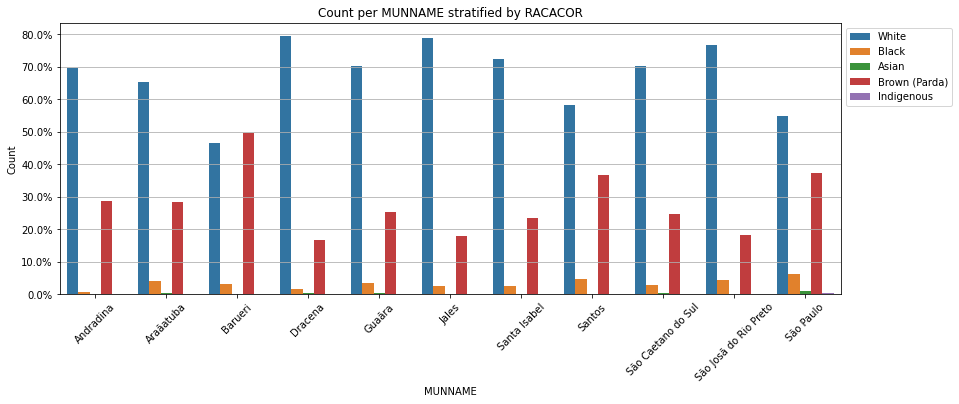

,MUNNAME,RACACOR,percent
0,Andradina,Asian,0.192345
1,Andradina,Black,0.836699
2,Andradina,Brown (Parda),28.736295
3,Andradina,Indigenous,0.019234
4,Andradina,White,69.648009
5,Araãatuba,Asian,0.426179
6,Araãatuba,Black,4.053652
7,Araãatuba,Brown (Parda),28.494499
8,Araãatuba,Indigenous,0.009911
9,Araãatuba,White,65.175592


In [52]:
pct_plot(df, "MUNNAME", "RACACOR", percentage=True)

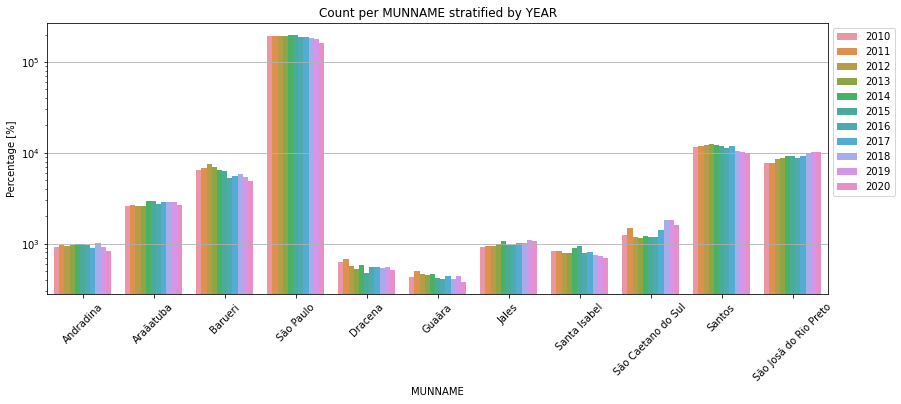

CODMUNNASC  IDADEMAE  ESTCIVMAE  ...  AGEGROUP   MONTH     DAY
MUNNAME   YEAR                                   ...                          
Andradina 2010         926       926        923  ...       926     926     926
          2011         971       971        971  ...       971     971     971
          2012         943       943        943  ...       943     943     943
          2013         954       954        950  ...       954     954     954
          2014         987       987        981  ...       987     987     987
...                    ...       ...        ...  ...       ...     ...     ...
São Paulo 2016      188831    188825     188492  ...    188831  188831  188831
          2017      189474    189471     189156  ...    189474  189474  189474
          2018      184714    184712     184351  ...    184714  184714  184714
          2019      177332    177324     176983  ...    177332  177332  177332
          2020      163559    163557     163155  ...    163559  163559  163559

[121 rows x 15 columns]

In [53]:
pct_plot(df, "MUNNAME", "YEAR", percentage=False, y_logscale=True)

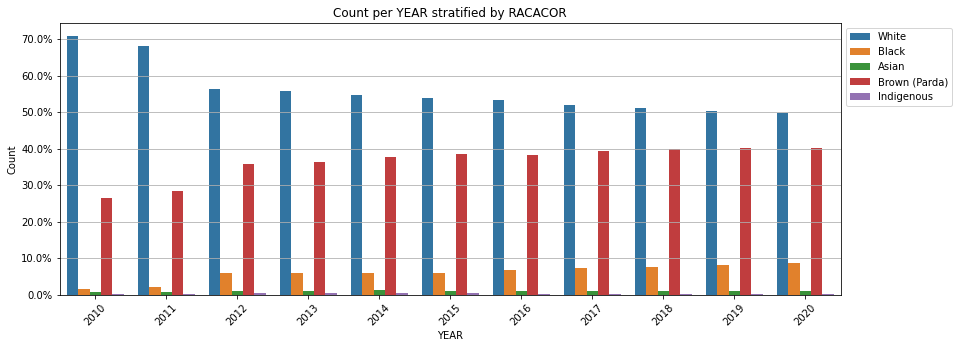

,YEAR,RACACOR,percent
0,2010,Asian,0.653374
1,2010,Black,1.501559
2,2010,Brown (Parda),26.636659
3,2010,Indigenous,0.180134
4,2010,White,70.911743
5,2011,Asian,0.744740
6,2011,Black,2.203592
7,2011,Brown (Parda),28.447159
8,2011,Indigenous,0.222284
9,2011,White,68.251829


In [54]:
pct_plot(df, "YEAR", "RACACOR", percentage=True)

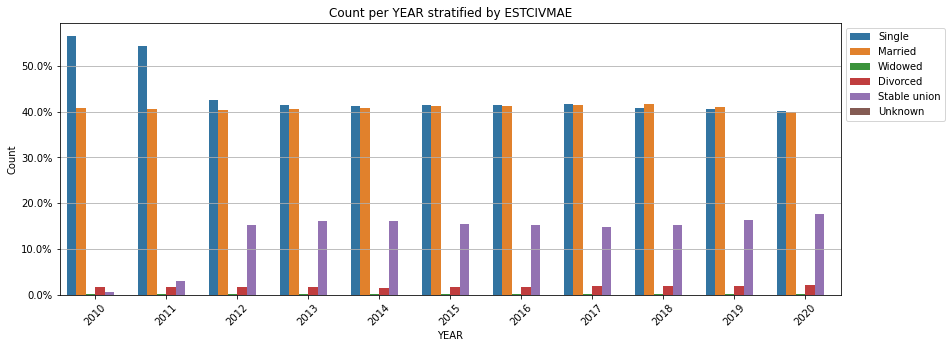

,YEAR,ESTCIVMAE,percent
0,2010,Divorced,1.644776
1,2010,Married,40.893463
2,2010,Single,56.521507
3,2010,Stable union,0.575983
4,2010,Widowed,0.183247
5,2011,Divorced,1.664070
6,2011,Married,40.674117
7,2011,Single,54.298666
8,2011,Stable union,3.019656
9,2011,Widowed,0.198656


In [55]:
pct_plot(df, "YEAR", "ESTCIVMAE", percentage=True)

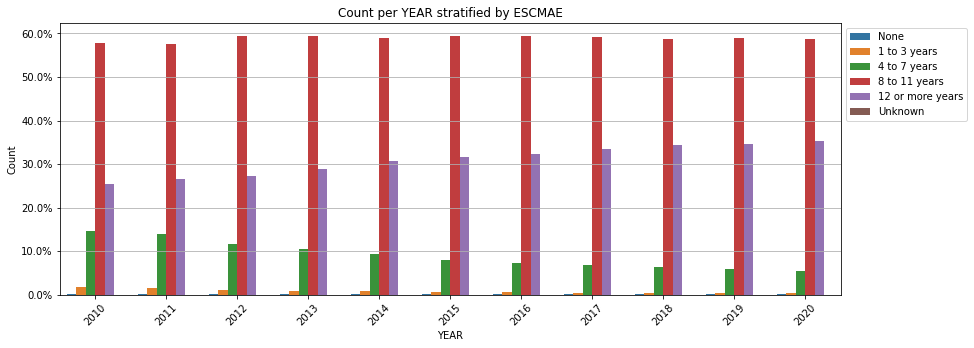

,YEAR,ESCMAE,percent
0,2010,1 to 3 years,1.697260
1,2010,12 or more years,25.489586
2,2010,4 to 7 years,14.656656
3,2010,8 to 11 years,57.767321
4,2010,None,0.214381
5,2011,1 to 3 years,1.487731
6,2011,12 or more years,26.639567
7,2011,4 to 7 years,14.045927
8,2011,8 to 11 years,57.498162
9,2011,None,0.199968


In [56]:
pct_plot(df, "YEAR", "ESCMAE", percentage=True)

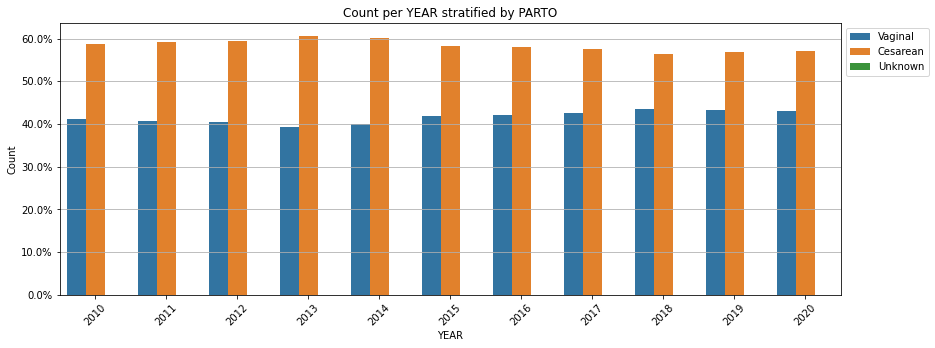

,YEAR,PARTO,percent
0,2010,Cesarean,58.771177
1,2010,Vaginal,41.222152
2,2011,Cesarean,59.271187
3,2011,Vaginal,40.709998
4,2012,Cesarean,59.414375
5,2012,Vaginal,40.558734
6,2013,Cesarean,60.604280
7,2013,Vaginal,39.384319
8,2014,Cesarean,60.014194
9,2014,Vaginal,39.975972


In [57]:
pct_plot(df, "YEAR", "PARTO", percentage=True)

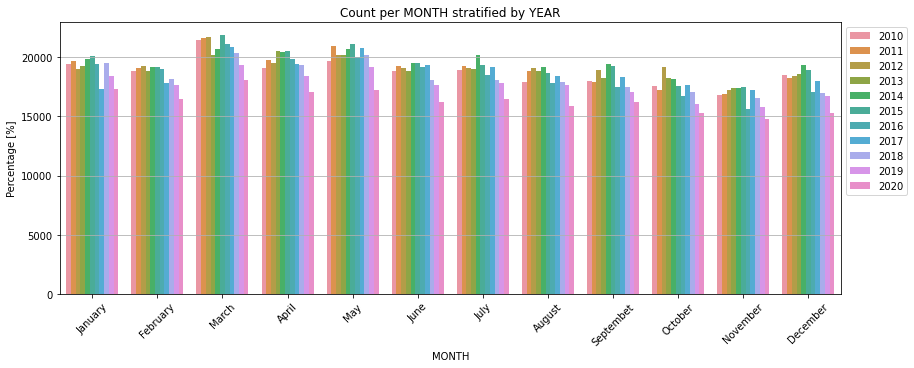

CODMUNNASC  IDADEMAE  ESTCIVMAE  ...  MUNNAME  AGEGROUP    DAY
MONTH     YEAR                                   ...                          
April     2010       19113     19113      18981  ...    19113     19113  19113
          2011       19787     19784      19755  ...    19787     19787  19787
          2012       19493     19492      19446  ...    19493     19493  19493
          2013       20492     20491      20452  ...    20492     20492  20492
          2014       20387     20387      20368  ...    20387     20387  20387
...                    ...       ...        ...  ...      ...       ...    ...
Septembet 2016       17458     17457      17427  ...    17458     17458  17458
          2017       18324     18324      18293  ...    18324     18324  18324
          2018       17468     17468      17440  ...    17468     17468  17468
          2019       17093     17093      17057  ...    17093     17093  17093
          2020       16219     16218      16186  ...    16219     16219  16219

[132 rows x 15 columns]

In [58]:
pct_plot(df, "MONTH", "YEAR", percentage=False)

# 2020

In [59]:
df2020 = df[df.YEAR == 2020]

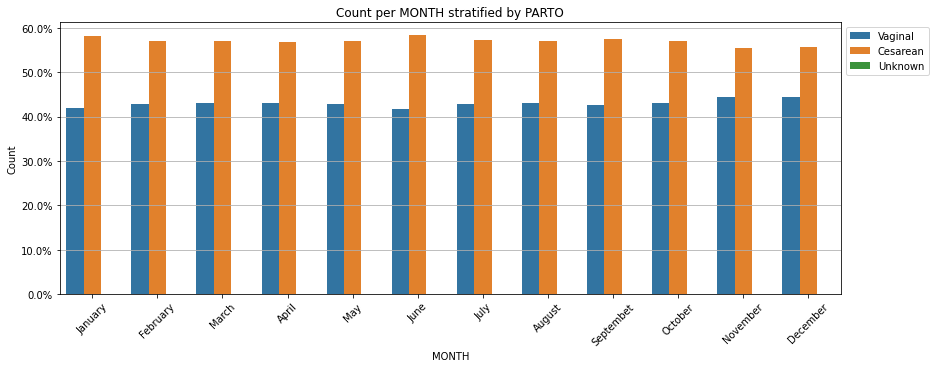

,MONTH,PARTO,percent
0,April,Cesarean,56.870788
1,April,Vaginal,43.117492
2,August,Cesarean,56.983275
3,August,Vaginal,43.016725
4,December,Cesarean,55.561361
5,December,Vaginal,44.419045
6,February,Cesarean,57.088985
7,February,Vaginal,42.892768
8,January,Cesarean,58.107485
9,January,Vaginal,41.857917


In [60]:
pct_plot(df2020, "MONTH", "PARTO", percentage=True)

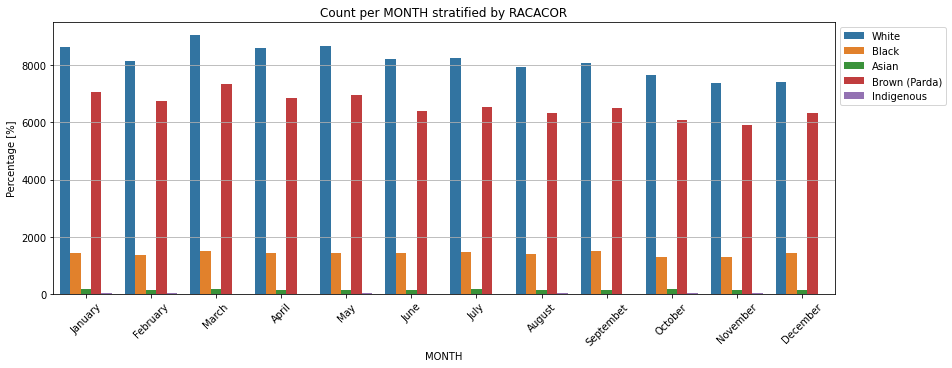

CODMUNNASC  IDADEMAE  ESTCIVMAE  ...  AGEGROUP  YEAR   DAY
MONTH     RACACOR                                         ...                      
April     Asian                 162       162        161  ...       162   162   162
          Black                1438      1438       1432  ...      1438  1438  1438
          Brown (Parda)        6856      6856       6841  ...      6856  6856  6856
          Indigenous             23        23         23  ...        23    23    23
          White                8578      8578       8566  ...      8578  8578  8578
August    Asian                 151       151        151  ...       151   151   151
          Black                1415      1415       1407  ...      1415  1415  1415
          Brown (Parda)        6325      6325       6313  ...      6325  6325  6325
          Indigenous             30        30         30  ...        30    30    30
          White                7923      7923       7906  ...      7923  7923  7923
December  Asian                 142       142        142  ...       142   142   142
          Black                1435      1435       1431  ...      1435  1435  1435
          Brown (Parda)        6314      6314       6297  ...      6314  6314  6314
          Indigenous             17        17         16  ...        17    17    17
          White                7388      7388       7382  ...      7388  7388  7388
February  Asian                 159       159        158  ...       159   159   159
          Black                1369      1369       1365  ...      1369  1369  1369
          Brown (Parda)        6747      6747       6732  ...      6747  6747  6747
          Indigenous             27        27         27  ...        27    27    27
          White                8129      8129       8111  ...      8129  8129  8129
January   Asian                 165       165        165  ...       165   165   165
          Black                1445      1445       1442  ...      1445  1445  1445
          Brown (Parda)        7067      7067       7032  ...      7067  7067  7067
          Indigenous             27        27         27  ...        27    27    27
          White                8630      8630       8610  ...      8630  8630  8630
July      Asian                 170       170        170  ...       170   170   170
          Black                1486      1486       1482  ...      1486  1486  1486
          Brown (Parda)        6539      6539       6528  ...      6539  6539  6539
          Indigenous             21        21         21  ...        21    21    21
          White                8244      8244       8231  ...      8244  8244  8244
June      Asian                 138       138        137  ...       138   138   138
          Black                1421      1421       1417  ...      1421  1421  1421
          Brown (Parda)        6407      6407       6389  ...      6407  6407  6407
          Indigenous             18        18         18  ...        18    18    18
          White                8193      8193       8185  ...      8193  8193  8193
March     Asian                 168       168        167  ...       168   168   168
          Black                1513      1513       1508  ...      1513  1513  1513
          Brown (Parda)        7323      7323       7302  ...      7323  7323  7323
          Indigenous             20        20         20  ...        20    20    20
          White                9029      9029       9013  ...      9029  9029  9029
May       Asian                 154       154        154  ...       154   154   154
          Black                1445      1445       1443  ...      1445  1445  1445
          Brown (Parda)        6938      6938       6926  ...      6938  6938  6938
          Indigenous             28        28         28  ...        28    28    28
          White                8655      8655       8644  ...      8655  8655  8655
November  Asian                 142       142        142  ...       142   142

In [61]:
pct_plot(df2020, "MONTH", "RACACOR", percentage=False)

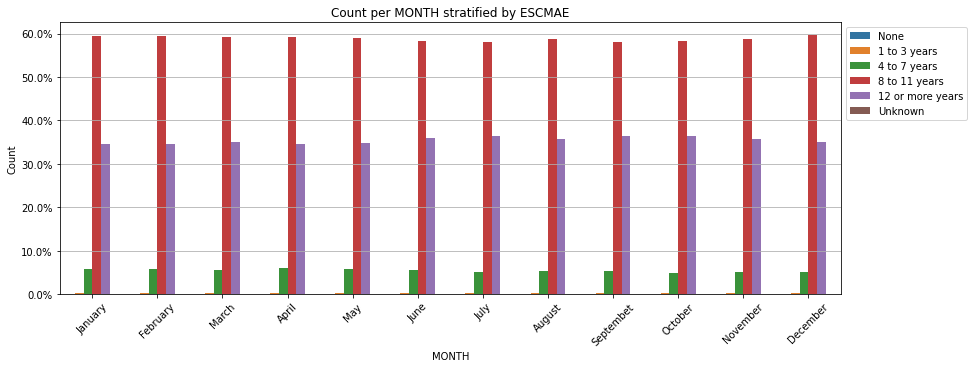

,MONTH,ESCMAE,percent
0,April,1 to 3 years,0.328157
1,April,12 or more years,34.497510
2,April,4 to 7 years,5.936127
3,April,8 to 11 years,59.126868
4,April,None,0.099619
5,August,1 to 3 years,0.328179
6,August,12 or more years,35.620069
7,August,4 to 7 years,5.282423
8,August,8 to 11 years,58.680972
9,August,None,0.075734


In [62]:
pct_plot(df2020, "MONTH", "ESCMAE", percentage=True)

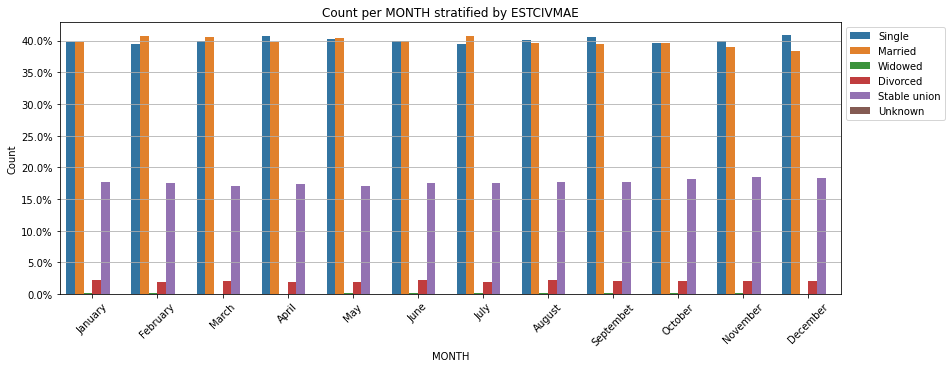

,MONTH,ESTCIVMAE,percent
0,April,Divorced,1.863463
1,April,Married,39.777322
2,April,Single,40.720774
3,April,Stable union,17.316144
4,April,Widowed,0.105479
5,August,Divorced,2.164721
6,August,Married,39.583465
7,August,Single,40.113601
8,August,Stable union,17.772168
9,August,Widowed,0.132534


In [63]:
pct_plot(df2020, "MONTH", "ESTCIVMAE", percentage=True)

In [37]:
df

,CODMUNNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,PARTO,DTNASC,RACACOR,IDANOMAL,RACACORMAE,MUNNAME,AGEGROUP,YEAR,MONTH,DAY
3420,350210,20.0,Single,8 to 11 years,0.0,0.0,5.0,Vaginal,2017-01-02,White,NaN,White,Andradina,A2,2017,January,2
3421,350210,32.0,Single,8 to 11 years,2.0,0.0,4.0,Vaginal,2017-01-02,White,NaN,White,Andradina,A2,2017,January,2
3422,350210,39.0,Married,8 to 11 years,1.0,1.0,4.0,Cesarean,2017-01-02,Brown (Parda),NaN,Brown (Parda),Andradina,A3,2017,January,2
3423,350210,21.0,Married,8 to 11 years,1.0,0.0,5.0,Cesarean,2017-01-03,Brown (Parda),NaN,Brown (Parda),Andradina,A2,2017,January,3
3424,350210,25.0,Married,12 or more years,1.0,0.0,5.0,Cesarean,2017-01-04,Brown (Parda),NaN,Brown (Parda),Andradina,A2,2017,January,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601343,355030,40.0,NaN,NaN,NaN,NaN,5.0,Cesarean,2016-04-15,NaN,No,NaN,São Paulo,A3,2016,April,15
601355,355030,29.0,NaN,NaN,NaN,NaN,5.0,Cesarean,2016-05-26,NaN,No,NaN,São Paulo,A2,2016,May,26
601373,355030,38.0,NaN,NaN,NaN,NaN,5.0,Cesarean,2016-10-21,NaN,No,NaN,São Paulo,A3,2016,October,21
601377,355030,36.0,NaN,NaN,NaN,NaN,5.0,Cesarean,2016-01-19,NaN,No,NaN,São Paulo,A3,2016,January,19


In [38]:
df[["IDADEMAE", "QTDFILVIVO", "QTDFILMORT"]].corr()

,IDADEMAE,QTDFILVIVO,QTDFILMORT
IDADEMAE,1.000000,0.314441,0.175312
QTDFILVIVO,0.314441,1.000000,0.143657
QTDFILMORT,0.175312,0.143657,1.000000


In [35]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
pearson_pairs = [
  ["IDADEMAE"]
]
spearman_pairs = [
  ["IDADEMAE", "ESCMAE"],
  ["IDADEMAE", "QTDFILVIVO"],
  ["IDADEMAE", "QTDFILMORTO"],
  ["IDADEMAE", "GESTACAO"],
]
cat_num_pairs = [
  "DTNASC"
]
cat_pairs = [
  ["PARTO", "YEAR"],
  ["PARTO", "YEAR"],
  ["PARTO", "YEAR"],
  
]
raw_df.corr().loc[
  ["DTNASC", "IDADEMAE"]
]

NameError: ignored